In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
#read the dataset
customer_data = pd.read_csv(r'D:/BISI\CST2106\final project\starbucks\dataclean1117\kmeandata.csv')  # 替换为你的实际数据路径

In [5]:
customer_data.head()

,gender,age,memberid,became_member_on,income,received counts,viewed counts,completed counts,transactions_counts,MaxTime,totalamount,memberdate,memberdays
0,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000,3.0,2.0,1.0,4.0,570.0,15.62,2017-11-11,416
1,M,58,4de38d89a91c4286a583085d909817f9,20180129,70000,6.0,5.0,2.0,6.0,594.0,30.41,2018-01-29,337
2,M,58,2b91e3c00a424185ab261b2a204c9718,20170916,53000,5.0,5.0,3.0,10.0,696.0,122.65,2017-09-16,472
3,M,58,932715eb8a33450c83c1557c99968c7b,20180717,39000,5.0,2.0,NaN,5.0,576.0,5.04,2018-07-17,168
4,M,58,b4a4a6b9648a45baa15f438ffb5565e9,20171227,73000,5.0,3.0,NaN,6.0,702.0,23.45,2017-12-27,370


In [6]:
customer_data.dtypes

gender                  object
age                      int64
memberid                object
became_member_on         int64
income                   int64
received counts        float64
viewed counts          float64
completed counts       float64
transactions_counts    float64
MaxTime                float64
totalamount            float64
memberdate              object
memberdays               int64
dtype: object

In [10]:
customer_data['gender'].replace({'M': 1, 'F': 2, 'O': 3}, inplace=True)

In [9]:
customer_data.isnull().sum()

gender                    0
age                       0
memberid                  0
became_member_on          0
income                    0
received counts           5
viewed counts           150
completed counts       2839
transactions_counts     333
MaxTime                 333
totalamount             333
memberdate                0
memberdays                0
dtype: int64

In [11]:
customer_data.fillna(0, inplace=True)

In [12]:
customer_data.isnull().sum()

gender                 0
age                    0
memberid               0
became_member_on       0
income                 0
received counts        0
viewed counts          0
completed counts       0
transactions_counts    0
MaxTime                0
totalamount            0
memberdate             0
memberdays             0
dtype: int64

In [29]:
# select the features for kmean
features = ['age', 'income', 'gender', 'totalamount','MaxTime','transactions_counts','memberdays']

In [30]:
# create the training data 
X = customer_data[features]

In [31]:
# scalering the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# choose the propraite k
k = range(5,15)
K = []
WCSS = []
for i in k:
    kmodel = KMeans(n_clusters=i).fit(customer_data[['age', 'income', 'gender', 'totalamount','MaxTime','transactions_counts','memberdays']])
    wcss_score = kmodel.inertia_
    WCSS.append(wcss_score)
    K.append(i)

C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [14]:
K, WCSS

([5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [359534874513.81525,
  253703667495.48633,
  184058634394.98816,
  140420306998.9763,
  114835753108.8132,
  93900362242.4907,
  79008112622.35873,
  66044471498.43135,
  56469067083.07075,
  49288030449.32971])

In [15]:
# Store the number of clusters and their respective WSS scores in a dataframe
wss = pd.DataFrame({'cluster': K, 'WSS_Score':WCSS})
wss

,cluster,WSS_Score
0,5,3.595349e+11
1,6,2.537037e+11
2,7,1.840586e+11
3,8,1.404203e+11
4,9,1.148358e+11
5,10,9.390036e+10
6,11,7.900811e+10
7,12,6.604447e+10
8,13,5.646907e+10
9,14,4.928803e+10


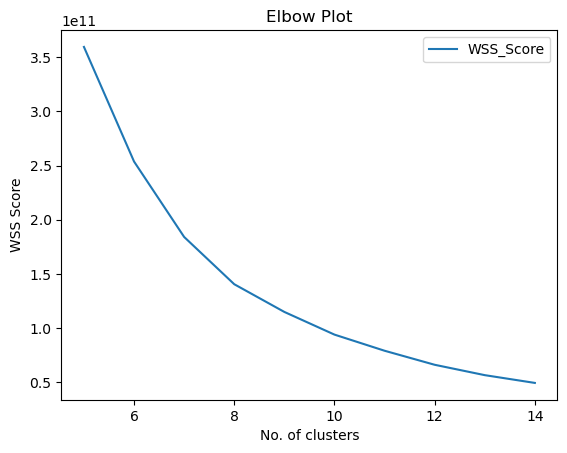

In [16]:
# Now, plot a Elbow plot
wss.plot(x='cluster', y = 'WSS_Score')
plt.xlabel('No. of clusters')
plt.ylabel('WSS Score')
plt.title('Elbow Plot')
plt.show()

In [17]:
# import silhouette_score 
from sklearn.metrics import silhouette_score

In [19]:
# same as above, calculate sihouetter score for each cluster using a for loop

# try using a for loop
k = range(5,15) # to loop from 5 to 15
K = []         # to store the values of k
ss = []        # to store respective silhouetter scores
for i in k:
    kmodel = KMeans(n_clusters=i,).fit(customer_data[['age', 'income', 'gender', 'totalamount','MaxTime','transactions_counts','memberdays']], )
    ypred = kmodel.labels_
    sil_score = silhouette_score(customer_data[['age', 'income', 'gender', 'totalamount','MaxTime','transactions_counts','memberdays']], ypred)
    K.append(i)
    ss.append(sil_score)

C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [20]:
ss

[0.5618493312664893,
 0.5457542112258424,
 0.5464455008100154,
 0.5440030593973453,
 0.5270368425511182,
 0.5212637931628931,
 0.5306144484979806,
 0.5287044328301895,
 0.5223947853180749,
 0.5160347402898322]

In [21]:
# Store the number of clusters and their respective silhouette scores in a dataframe
wss['Silhouette_Score']=ss

In [22]:
wss

,cluster,WSS_Score,Silhouette_Score
0,5,3.595349e+11,0.561849
1,6,2.537037e+11,0.545754
2,7,1.840586e+11,0.546446
3,8,1.404203e+11,0.544003
4,9,1.148358e+11,0.527037
5,10,9.390036e+10,0.521264
6,11,7.900811e+10,0.530614
7,12,6.604447e+10,0.528704
8,13,5.646907e+10,0.522395
9,14,4.928803e+10,0.516035


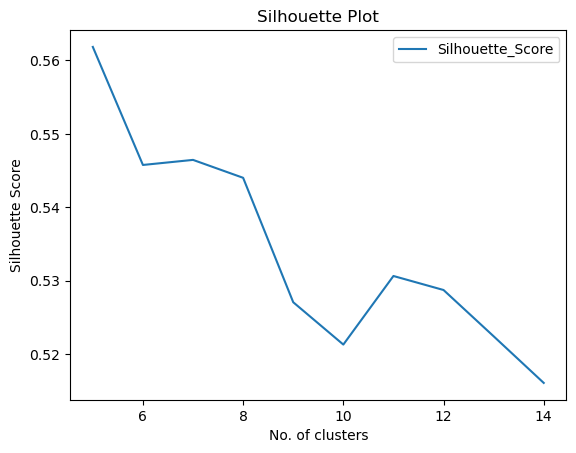

In [23]:
# Now, plot the silhouette plot
wss.plot(x='cluster', y='Silhouette_Score')
plt.xlabel('No. of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

In [24]:
# set the k number
num_clusters = 8

In [27]:
# create the kmean model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

In [32]:
# train the model
kmeans.fit(X_scaled)

C:\Users\zhuan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(random_state=42)

In [33]:
# add the cluster value to the dataset
customer_data['Cluster'] = kmeans.labels_

In [34]:
kmeans.cluster_centers_

array([[-0.1952721 , -0.50431467,  1.16891916, -0.3205125 ,  0.09649821,
        -0.27299569, -0.49335004],
       [ 0.64803235,  1.07570515,  1.10978573,  0.30597087,  0.0590711 ,
        -0.27305927,  0.10824958],
       [-0.22968114, -0.52951321, -0.53347796, -0.3310665 ,  0.32707571,
         0.8149465 ,  2.01969913],
       [ 0.15842712,  0.52304249,  0.16536032,  5.15742659,  0.25972471,
         0.41960931,  0.10949354],
       [-0.42971402, -0.66078423, -0.84253979, -0.62308215,  0.01845146,
        -0.51607069, -0.73285203],
       [ 0.24696278,  0.42212311,  0.05377954, -0.80238585, -4.20111847,
        -1.47708843, -0.7244652 ],
       [ 0.58812732,  0.82480249, -0.84253979,  0.20776253,  0.09316652,
        -0.26042447,  0.03947822],
       [-0.56326757, -0.58955922, -0.17667915,  0.43507309,  0.45324124,
         1.52329496,  0.22486701]])

In [35]:
kmeans.labels_

array([4, 4, 4, ..., 0, 0, 0])

In [37]:
customer_data.to_csv(r'D:\BISI\CST2106\final project\starbucks\dataclean1117\kmeanlabel.csv', index=False)

In [ ]:
# visualization for the clusters selected some features
plt.scatter(customer_data['income'], customer_data['transactions_counts'], c=customer_data['Cluster'], cmap='viridis')
plt.xlabel('income')
plt.ylabel('transactions_counts')
plt.title('Customer Segmentation using K-Means')
plt.show()